# Calculate the mean inside eddies from model data
**Code written by: Billy Atkinson(watkinson@umces.edu)**  
**Date of Last Revision: 09/01/2022**  

In [1]:
import xarray as xr 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import netCDF4 as nc
import datetime as dt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
from scipy.stats import linregress
import numpy.ma as ma
import glob
import os

In [2]:
#dir = '/data/watkinson/Fall2021/Model/Data/'
#dir = '/data/watkinson/Summer2022/data/'
#data = nc.Dataset(dir + 'sz_field_regrid.nc',mode='w')
data = nc.Dataset('/data/watkinson/Summer2022/data/Zs_field.nc',mode='w')
print(data)
Zs = data.variables['sz_field'][0,0,:,:]
#print(np.shape(Zs))
Zs = data.createVariable('Zs','f4',('lon','lat',))
#print(data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): 
    variables(dimensions): 
    groups: 


KeyError: 'sz_field'

In [3]:
dir = '/data/watkinson/Fall2021/Model/Data/'
ds = xr.open_dataset(dir + 'sz_field.nc')
start = dt.datetime(2005,1,1)
new_dates = [start + dt.timedelta(days=i) for i in range(730)]
ds['time']=new_dates
ds['lon']=ds.lon + 360
#amp = ds.amplitude.loc['2004-04-01T00:00:00.000000000':'2004-04-30T00:00:00.000000000']
#ds = ds.loc['2004-04-01T00:00:00.000000000':'2004-04-30T00:00:00.000000000']
#print(ds.variables)
#print(amp)
#ds.drop('dep')
dir = '/data/watkinson/Summer2022/data/'
ds.to_netcdf(dir + 'Zs_field.nc','w')

PermissionError: [Errno 13] Permission denied: b'/data/watkinson/Summer2022/data/Zs_field.nc'

In [4]:
dir = '/data/watkinson/Summer2022/data/'
ds = xr.open_dataset(dir + 'Zs_field.nc')
ds

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*

In [2]:
import xesmf as xe
dir = '/data/watkinson/Fall2021/Model/Data/'
#ds = xr.open_dataset(dir + 'sz_field.nc')
#dir = '/data/watkinson/Fall2022/'
ds = xr.open_dataset(dir + 'sz_field.nc')
#ds['lon']=ds.lon + 360
#dir = "/data/watkinson/Summer2022/data/hycom_ssh/Daily_SSH_files/"
dir = '/data/watkinson/Fall2022/SSH_data/Cropped_SSH_Data/'
ds_out = xr.open_dataset(dir + "hycom_gomu_501_20040405_cropped.nc")
#ds_out['lon']=ds_out.lon +360
regridder = xe.Regridder(ds,ds_out,"bilinear")
ds_regrid = regridder(ds)
print(ds_regrid)
#dir = '/data/watkinson/Summer2022/data/'
dir = '/data/watkinson/Fall2022/'
ds_regrid.to_netcdf(dir + 'sz_field_regrid.nc',mode='w')

/data/watkinson/anaconda3/lib/python3.9/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


<xarray.Dataset>
Dimensions:   (time: 730, dep: 1, lat: 346, lon: 541)
Coordinates:
  * time      (time) timedelta64[ns] NaT NaT NaT NaT NaT ... NaT NaT NaT NaT NaT
  * lon       (lon) float64 -98.0 -97.96 -97.92 -97.88 ... -76.48 -76.44 -76.4
  * lat       (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
Dimensions without coordinates: dep
Data variables:
    sz_field  (time, dep, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    regrid_method:  bilinear


In [31]:
dir = '/data/watkinson/Summer2022/data/'
ds_regrid = xr.open_dataset(dir + 'sz_field_regrid.nc')
#ds_regrid['lon'] = ds_regrid.lon + 360
ds_regrid

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*

In [10]:
dir = "/data/watkinson/Spring2022/Satellite/data/eddies/Cyclonic/"
df = xr.open_dataset(dir + "Cyclonic_20060605.nc")
df

<xarray.Dataset>
Dimensions:                        (obs: 14, NbSample: 50)
Dimensions without coordinates: obs, NbSample
Data variables: (12/24)
    amplitude                      (obs) float32 ...
    effective_area                 (obs) float32 ...
    effective_contour_height       (obs) float32 ...
    effective_contour_latitude     (obs, NbSample) float32 ...
    effective_contour_longitude    (obs, NbSample) float32 ...
    effective_contour_shape_error  (obs) float32 ...
    ...                             ...
    speed_contour_latitude         (obs, NbSample) float32 ...
    speed_contour_longitude        (obs, NbSample) float32 ...
    speed_contour_shape_error      (obs) float32 ...
    speed_radius                   (obs) float32 ...
    time                           (obs) datetime64[ns] ...
    uavg_profile                   (obs, NbSample) float32 ...
Attributes:
    track_extra_variables:     height_max_speed_contour,height_external_conto...
    track_array_variables:     50
    array_variables:           contour_lon_e,contour_lat_e,contour_lon_s,cont...
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    comment:                   Surface product; mesoscale eddies
    framework_used:            https://github.com/AntSimi/py-eddy-tracker
    framework_version:         v3.5.0
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    rotation_type:             -1

In [4]:
Zs = xr.open_dataset(dir + 'Zs_field_oneday.nc')
Zs

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*

In [7]:
from py_eddy_tracker.dataset.grid import RegularGridDataset
from py_eddy_tracker.observations.observation import EddiesObservations
Zs_data = RegularGridDataset('/data/watkinson/Fall2022/sz_field_regrid.nc',"lon","lat")
Zs_data = Zs_data
Zs_data.load(

We assume pixel position of grid is centered for /data/watkinson/Fall2022/sz_field_regrid.nc


TypeError: 'RegularGridDataset' object is not subscriptable

In [2]:
#dir = '/data/watkinson/Summer2022/data/'
dir = '/data/watkinson/Fall2022/'
Zs = xr.open_dataset(dir + 'sz_field_regrid.nc')
#Zs.drop_dims('depth')
#Zs['lon'] = Zs.lon + 360
Zs = Zs.sz_field[0,0,:,:]
#Zs.to_netcdf(dir + 'Zs_field_oneday.nc')
#print(Zs)
#Zs = xr.open_dataset(dir + 'Zs_field_oneday.nc')

#take anticyclonic eddy files paths, sort them and load them into list
anti_files = sorted(glob.glob('/data/watkinson/Summer2022/data/eddies/Anticyclonic/Anticyclonic_2005*.nc'))
#anti_files = anti_files[0:1]
print(len(anti_files))
#take cyclonic eddy files paths, sort them and load them into list
cycl_files = sorted(glob.glob('/data/watkinson/Summer2022/data/eddies/Cyclonic/Cyclonic_2005*.nc'))
#cycl_files = cycl_files[0:1]
print(len(cycl_files))

cycl_chlor_mean = list()#empty list to load cyclonic eddy chlorophyll mean vlaues into throghout loop below
anti_chlor_mean = list()#empty list to load anticyclonic eddy chlorophyll mean values into throghout loop below

from py_eddy_tracker.dataset.grid import RegularGridDataset
from py_eddy_tracker.observations.observation import EddiesObservations

n=0 #set n to 0 so the loop starts with first file in list
while n < len(anti_files): #once finalized, put this inside a funciton so you can calcualte the mean for multiple variables
    #Load in data
    a = EddiesObservations.load_file(anti_files[n])#anticyclonic eddy data
    c = EddiesObservations.load_file(cycl_files[n])#cyclonic eddy data
    Zs_data = RegularGridDataset('/data/watkinson/Fall2022/sz_field_regrid.nc',"lon","lat")#satellite data
    
    #this interpolates the satellite data grid onto the contours of the eddy data and uses mean function to calcualte values inside these contours
        #can also do this method for: ‘center’, ‘mean’, ‘max’, ‘min’, ‘nearest’ 
    anti_chlor = a.interp_grid(Zs_data, "sz_field", method="mean", intern=True)#this interpolates the sa
    cycl_chlor = c.interp_grid(Zs_data, "sz_field", method="mean", intern=True)
    
    #append the result for each file loop to the variables below
    anti_chlor_mean = np.concatenate([anti_chlor_mean,anti_chlor])
    cycl_chlor_mean = np.concatenate([cycl_chlor_mean,cycl_chlor])
    #anti_chlor_mean.append(anti_chlor)
    #cycl_chlor_mean.append(cycl_chlor)
    
    n=n+1


365
365


File was created with py-eddy-tracker version '3.5.0' but software version is '3.6'
File was created with py-eddy-tracker version '3.5.0' but software version is '3.6'
We assume pixel position of grid is centered for /data/watkinson/Fall2022/sz_field_regrid.nc
File was created with py-eddy-tracker version '3.5.0' but software version is '3.6'
File was created with py-eddy-tracker version '3.5.0' but software version is '3.6'
We assume pixel position of grid is centered for /data/watkinson/Fall2022/sz_field_regrid.nc
File was created with py-eddy-tracker version '3.5.0' but software version is '3.6'
File was created with py-eddy-tracker version '3.5.0' but software version is '3.6'
We assume pixel position of grid is centered for /data/watkinson/Fall2022/sz_field_regrid.nc
File was created with py-eddy-tracker version '3.5.0' but software version is '3.6'
File was created with py-eddy-tracker version '3.5.0' but software version is '3.6'
We assume pixel position of grid is centered for 

In [3]:
print("# of Anticyclonic Eddies in 2004:", np.size(anti_chlor_mean))
print("# of Anticyclonic Eddies filled with nan:",np.count_nonzero(np.isnan(anti_chlor_mean)))
M = anti_chlor_mean[~np.isnan(anti_chlor_mean)]
print("# of Anticyclonic Eddies that have a value:", np.size(M))
print("Index of Anticyclonic Eddies that have data:",np.where(anti_chlor_mean>0))
print("# of Cyclonic Eddies in 2004:", np.size(cycl_chlor_mean))
print("# of Cyclonic Eddies filled with nan:",np.count_nonzero(np.isnan(cycl_chlor_mean)))
N = cycl_chlor_mean[~np.isnan(cycl_chlor_mean)]
print("# of Cyclonic Eddies that have a value:", np.size(N))
print("Index of Cyclonic Eddies that have data:",np.where(cycl_chlor_mean>0))

# of Anticyclonic Eddies in 2004: 3006
# of Anticyclonic Eddies filled with nan: 428
# of Anticyclonic Eddies that have a value: 2578
Index of Anticyclonic Eddies that have data: (array([   0,    1,    2, ..., 3003, 3004, 3005]),)
# of Cyclonic Eddies in 2004: 4713
# of Cyclonic Eddies filled with nan: 432
# of Cyclonic Eddies that have a value: 4281
Index of Cyclonic Eddies that have data: (array([   0,    1,    2, ..., 4710, 4711, 4712]),)


In [4]:
cycl_chlor_mean = cycl_chlor_mean[np.logical_not(np.isnan(cycl_chlor_mean))]
anti_chlor_mean = anti_chlor_mean[np.logical_not(np.isnan(anti_chlor_mean))]
def running_mean(data):#,data2):
    n=21
    Rm=np.zeros(len(data))#gives value 0 for running mean array
    #Px=np.zeros(len(data2))#gives value 0 for the # of pixel values
    while n<len(data)-21:# runs a loop to calculate running mean
        Rm[n]=(data[n-10]+data[n-9]+data[n-8]+data[n-7]+data[n-6]+data[n-5]+data[n-4]+data[n-3]+data[n-2]+data[n-1]+data[n]+data[n+1]
               +data[n+2]+data[n+3]+data[n+4]+data[n+5]+data[n+6]+data[n+7]+data[n+8]+data[n+9]+data[n+10])/21
        #Px[n]=(data[n-10]+data[n-9]+data[n-8]+data[n-7]+data[n-6]+data[n-5]+data[n-4]+data[n-3]+data[n-2]+data[n-1]+data[n]+data[n+1]
               #+data[n+2]+data[n+3]+data[n+4]+data[n+5]+data[n+6]+data[n+7]+data[n+8]+data[n+9]+data[n+10])/21
        n=n+1
    return Rm#,Px

In [10]:
Rm_cycl_Zs_mean = running_mean(cycl_chlor_mean)
Rm_anti_Zs_mean = running_mean(anti_chlor_mean)
print(Rm_cycl_Zs_mean.dtype)

float64


In [ ]:
dir = '/data/watkinson/Spring2022/Satellite/data/eddies/'
import pandas as pd
cycl_eddies = pd.read_pickle(dir + "Cyclonic_eddies.pkl")
anti_eddies = pd.read_pickle(dir + "Anticyclonic_eddies.pkl")

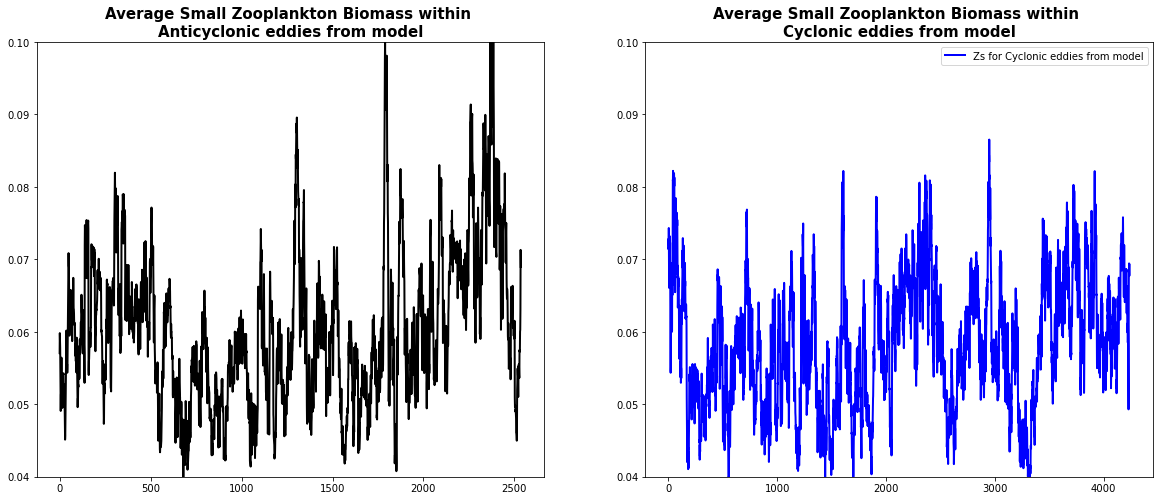

In [9]:
#fig = plt.figure(figsize=(12, 8), dpi=80)
#ax = fig.add_axes([.03,.03,.8,.8])
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,8))
ax1.set_title('Average Small Zooplankton Biomass within \nAnticyclonic eddies from model',loc='center',fontsize=15,fontweight='bold')
ax2.set_title('Average Small Zooplankton Biomass within \nCyclonic eddies from model',loc='center',fontsize=15,fontweight='bold')
ax1.set_ylim(.04,.10)
ax2.set_ylim(.04,.10)
#plt.title('Average Small Zooplankton Biomass within eddies from model',loc='center',fontsize=15,fontweight='bold')#,y=1.03)
ax1.plot(Rm_anti_Zs_mean[21:-21],label='Zs for Anticyclonic eddies from model',color='k',lw=2)
ax2.plot(Rm_cycl_Zs_mean[21:-21],label='Zs for Cyclonic eddies from model',color='blue',lw=2)#,alpha=.5)
plt.legend(loc='best')
plt.show()

In [5]:
import xarray as xr
dir = '/data/watkinson/Summer2022/data/cafe/1day_regrid/'
df = xr.open_dataset(dir + 'A2004002.L4_gom_day_CAFE.nc')
df

<xarray.Dataset>
Dimensions:  (lat: 346, lon: 541)
Coordinates:
    time     datetime64[ns] ...
  * lon      (lon) float64 -98.0 -97.96 -97.92 -97.88 ... -76.48 -76.44 -76.4
  * lat      (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
Data variables:
    npp      (lat, lon) float64 ...
    npp_mld  (lat, lon) float64 ...
    phyto_c  (lat, lon) float64 ...
    mu       (lat, lon) float64 ...
    mu_mld   (lat, lon) float64 ...
    chlor_a  (lat, lon) float32 ...
    mld      (lat, lon) float64 ...
Attributes:
    regrid_method:  bilinear

In [6]:
dir = '/data/watkinson/Summer2022/data/'
ds_regrid = xr.open_dataset(dir + 'sz_field_regrid.nc')
ds_regrid

<xarray.Dataset>
Dimensions:   (time: 730, dep: 1, lat: 346, lon: 541)
Coordinates:
  * time      (time) timedelta64[ns] NaT NaT NaT NaT NaT ... NaT NaT NaT NaT NaT
  * lon       (lon) float64 -98.0 -97.96 -97.92 -97.88 ... -76.48 -76.44 -76.4
  * lat       (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
Dimensions without coordinates: dep
Data variables:
    sz_field  (time, dep, lat, lon) float64 ...
Attributes:
    regrid_method:  bilinear

In [7]:
Zs = xr.open_dataset(dir + 'Zs_field_oneday.nc')
Zs

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*